In [36]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import torchvision
import numpy as np
from matplotlib import pyplot as plt
# from tqdm import tqdm
import random
# import cv2
import PIL
import os
plt.style.use('ggplot')

In [37]:
def salt_and_pepper(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    # output = np.zeros(image.shape)
    output = torch.zeros(image.shape)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0.0
            elif rdn > thres:
                output[i][j] = 1.0
            else:
                output[i][j] = image[i][j]
    return output.reshape(1, image.shape[0], image.shape[1])


In [ ]:
binary_choice = lambda p: True if np.random.rand() < p else False

def salt_and_pepper(image_tensor, prob):
    out = image_tensor.clone()
    mask = image_tensor.clone()





In [38]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))

        # images and labels are the same, images are just noisy
        self.images = []

        for i, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for filename in os.listdir(class_dir):
                self.images.append(os.path.join(class_dir, filename))
                # self.labels.append(class_name)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path = self.images[idx]
        label = None

        with open(image_path, 'rb') as f:
            image = PIL.Image.open(f)
            if self.transform:
                image = self.transform(image)
                label = image.clone() # clear image is the label
                image = salt_and_pepper(image.squeeze(),0.05) # add noise

        return image, label


In [40]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((256, 256)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Grayscale(num_output_channels=1),
])

batch_size = 10

train_loader = DataLoader(
    CustomDataset(root_dir="./datasets/sports/train/", transform=transform),
    batch_size=batch_size,
    shuffle=True
)

In [41]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

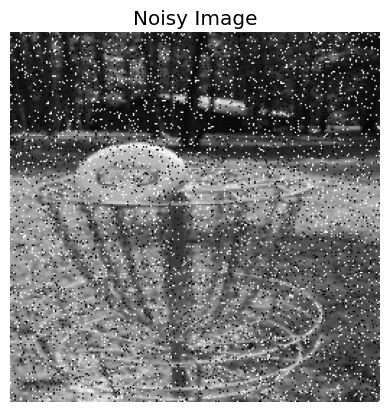

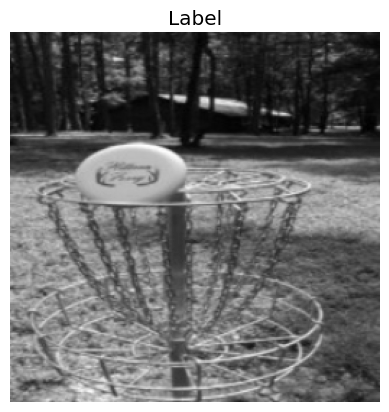

In [43]:
# Assuming train_loader is already defined
# Get one batch of data

# Choose a random image from the batch
idx = np.random.randint(0, batch_size)  # Choose a random index within the batch

# Get the image and label
image = images[idx]
label = labels[idx]

# Convert the image tensor to a numpy array
image = image.permute(1, 2, 0).numpy()  # Change the order of dimensions for display
label = label.permute(1, 2, 0).numpy()  # Change the order of dimensions for display

# Display the image
fig, ax = plt.subplots();
ax.imshow(image, cmap="gray");
ax.set_title("Noisy Image")
ax.axis('off');

fig, ax = plt.subplots();
ax.imshow(label, cmap="gray");
ax.set_title("Label")
ax.axis('off');
